# Recitation 2: Neural Network Fundamentals with PyTorch

This recitation introduces PyTorch, convolutional neural networks, and image classification through interactive demonstrations. This is preparatory material for Assignment 2.

**Note**: This is a tutorial session. Your homework assignment will be provided separately in Assignment 2.


## Setup

Run the code below to set up the notebook.

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms
from torchvision import datasets

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm
import time

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Check PyTorch setup
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ Setup complete! Ready to build neural networks.")


PyTorch version: 2.7.1
CUDA available: False
Device: cpu
✅ Setup complete! Ready to build neural networks.


## Part 1: PyTorch Tensor Fundamentals

Before building neural networks, let's understand tensors, the fundamental data structure for deep learning. Tensors are multi-dimensional arrays. Here is what you can do with tensors in PyTorch.


In [4]:
print("🔧 TENSOR BASICS DEMONSTRATION")
print("=" * 50)

# Creating tensors
print("\n1. Creating Tensors:")
a = torch.tensor([1, 2, 3, 4])
b = torch.randn(2, 3)  # Random 2x3 matrix
c = torch.zeros(3, 3)  # 3x3 zero matrix
d = torch.ones(2, 2)   # 2x2 ones matrix

print(f"a: {a}")
print(f"b shape: {b.shape}, dtype: {b.dtype}")
print(f"c:\n{c}")
print(f"d:\n{d}")

# Tensor operations
print("\n2. Basic Operations:")
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])

print(f"x + y = {x + y}")
print(f"x * y = {x * y}")  # Element-wise multiplication
print(f"x @ y = {x @ y}")  # Dot product

# Matrix operations
print("\n3. Matrix Operations:")
A = torch.randn(3, 4)
B = torch.randn(4, 2)
C = A @ B  # Matrix multiplication
print(f"A shape: {A.shape}")
print(f"B shape: {B.shape}") 
print(f"C = A @ B shape: {C.shape}")

# Moving to GPU (if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n4. Device Operations:")
print(f"Using device: {device}")

x_gpu = x.to(device)
print(f"Tensor on {x_gpu.device}: {x_gpu}")

print("\n✅ Tensor fundamentals complete!")


🔧 TENSOR BASICS DEMONSTRATION

1. Creating Tensors:
a: tensor([1, 2, 3, 4])
b shape: torch.Size([2, 3]), dtype: torch.float32
c:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
d:
tensor([[1., 1.],
        [1., 1.]])

2. Basic Operations:
x + y = tensor([5., 7., 9.])
x * y = tensor([ 4., 10., 18.])
x @ y = 32.0

3. Matrix Operations:
A shape: torch.Size([3, 4])
B shape: torch.Size([4, 2])
C = A @ B shape: torch.Size([3, 2])

4. Device Operations:
Using device: cpu
Tensor on cpu: tensor([1., 2., 3.])

✅ Tensor fundamentals complete!


### Autograd: Automatic Differentiation

PyTorch's `autograd` system automatically computes gradients for us, essential for training neural networks! Let's see how it works:


In [5]:
print("🧮 AUTOGRAD DEMONSTRATION")
print("=" * 50)

# Enable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

print(f"Input values: x = {x}, y = {y}")
print(f"Gradient tracking: x requires_grad = {x.requires_grad}")

# Forward pass: compute a function
z = x**2 + 2*x*y + y**2  # z = (x + y)^2
print(f"\nForward pass: z = x² + 2xy + y² = {z}")

# Backward pass: compute gradients
z.backward()

print(f"\nGradients computed!")
print(f"∂z/∂x = 2x + 2y = {x.grad}")  # Should be 2*2 + 2*3 = 10
print(f"∂z/∂y = 2y + 2x = {y.grad}")  # Should be 2*3 + 2*2 = 10

# Verify manually
expected_dx = 2*x.item() + 2*y.item()
expected_dy = 2*y.item() + 2*x.item()
print(f"Expected: ∂z/∂x = {expected_dx}, ∂z/∂y = {expected_dy}")

print("\n📊 Computational Graph Example:")
# More complex example
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)

# Multi-step computation
c = a + b       # c = 3
d = c * a       # d = 3 * 1 = 3
e = d ** 2      # e = 9
f = torch.sin(e) # f = sin(9)

print(f"a = {a.item():.2f}, b = {b.item():.2f}")
print(f"c = a + b = {c.item():.2f}")
print(f"d = c * a = {d.item():.2f}")
print(f"e = d² = {e.item():.2f}")
print(f"f = sin(e) = {f.item():.4f}")

# Compute gradients
f.backward()
print(f"\nGradients:")
print(f"∂f/∂a = {a.grad:.4f}")
print(f"∂f/∂b = {b.grad:.4f}")

print("\n✅ Autograd demonstration complete!")


🧮 AUTOGRAD DEMONSTRATION
Input values: x = 2.0, y = 3.0
Gradient tracking: x requires_grad = True

Forward pass: z = x² + 2xy + y² = 25.0

Gradients computed!
∂z/∂x = 2x + 2y = 10.0
∂z/∂y = 2y + 2x = 10.0
Expected: ∂z/∂x = 10.0, ∂z/∂y = 10.0

📊 Computational Graph Example:
a = 1.00, b = 2.00
c = a + b = 3.00
d = c * a = 3.00
e = d² = 9.00
f = sin(e) = 0.4121

Gradients:
∂f/∂a = -21.8671
∂f/∂b = -5.4668

✅ Autograd demonstration complete!


## Part 2: Loading and Exploring MNIST Data

Now let's load the MNIST dataset, containing handwritten digits from 0-9. We'll explore the data and prepare it for training.


### Loading Data

In [8]:
print("📊 MNIST DATA LOADING")
print("=" * 50)

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert PIL Image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST mean/std
])

# Download and load datasets
print("Downloading MNIST dataset...")
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

print()
print(f"✅ Training samples: {len(train_dataset)}")
print(f"✅ Test samples: {len(test_dataset)}")

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print()
print(f"✅ Batch size: {batch_size}")
print(f"✅ Training batches: {len(train_loader)}")
print(f"✅ Test batches: {len(test_loader)}")

# Examine a single sample
sample_data, sample_label = train_dataset[0]
print(f"\nSample analysis:")
print(f"Image shape: {sample_data.shape}")  # [channels, height, width]
print(f"Image type: {type(sample_data)}")
print(f"Label: {sample_label}")
print(f"Data range: [{sample_data.min():.3f}, {sample_data.max():.3f}]")

print("\n✅ Data loading complete!")


📊 MNIST DATA LOADING

✅ Training samples: 60000
✅ Test samples: 10000

✅ Batch size: 64
✅ Training batches: 938
✅ Test batches: 157

Sample analysis:
Image shape: torch.Size([1, 28, 28])
Image type: <class 'torch.Tensor'>
Label: 5
Data range: [-0.424, 2.821]

✅ Data loading complete!


### Exploring Data

🖼️ MNIST Sample Visualization:


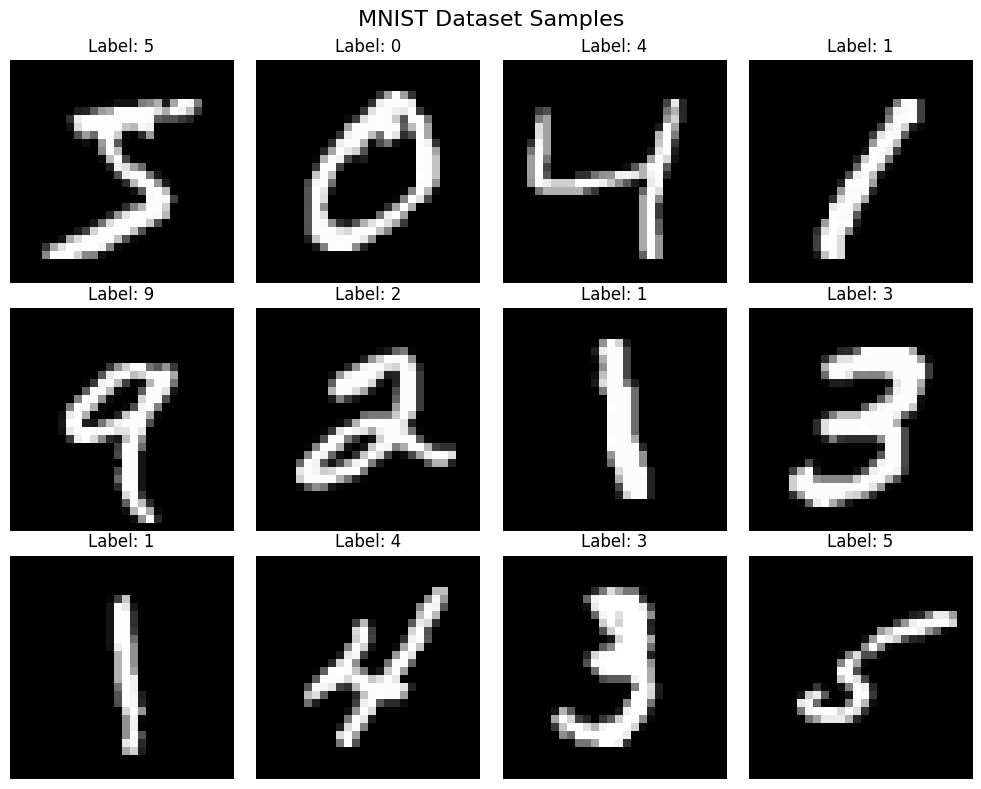


📈 Class Distribution Analysis:


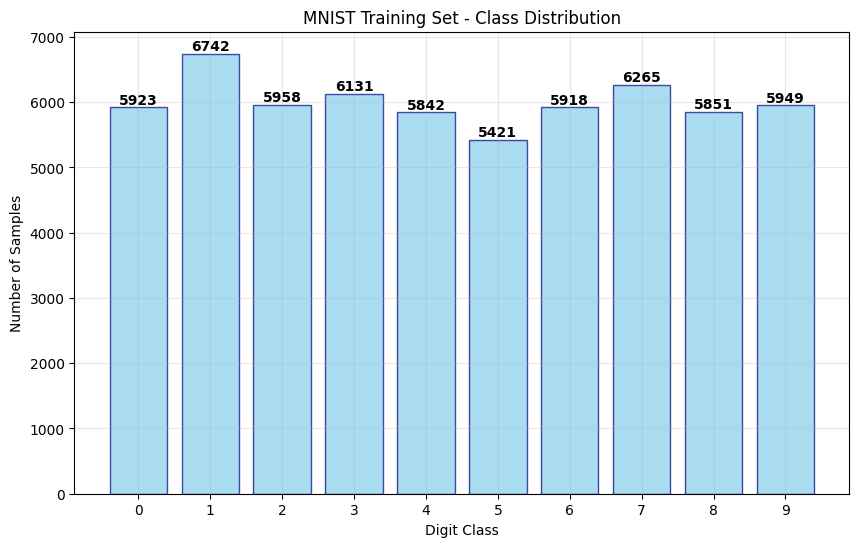

Dataset is well-balanced across all digit classes!


In [9]:
# Visualize some samples
def plot_samples(dataset, num_samples=12):
    fig, axes = plt.subplots(3, 4, figsize=(10, 8))
    fig.suptitle('MNIST Dataset Samples', fontsize=16)
    
    for i in range(num_samples):
        row, col = i // 4, i % 4
        image, label = dataset[i]
        
        # Convert tensor to numpy and remove channel dimension
        image_np = image.squeeze().numpy()
        
        axes[row, col].imshow(image_np, cmap='gray')
        axes[row, col].set_title(f'Label: {label}')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

print("🖼️ MNIST Sample Visualization:")
plot_samples(train_dataset)

# Check class distribution
print("\n📈 Class Distribution Analysis:")
labels = [train_dataset[i][1] for i in range(len(train_dataset))]
unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, alpha=0.7, color='skyblue', edgecolor='navy')
plt.xlabel('Digit Class')
plt.ylabel('Number of Samples')
plt.title('MNIST Training Set - Class Distribution')
plt.xticks(unique)
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("Dataset is well-balanced across all digit classes!")


## Part 3: Building a Convolutional Neural Network

Now let's build a CNN for digit classification. CNNs are perfect for image data because they can learn spatial features through convolution operations.


In [ ]:
class MNISTNet(nn.Module):
    """
    Convolutional Neural Network for MNIST digit classification.
    
    Architecture:
    - Conv2d (1 -> 32 filters, 3x3 kernel)
    - ReLU activation
    - Conv2d (32 -> 64 filters, 3x3 kernel) 
    - ReLU activation
    - MaxPool2d (2x2)
    - Dropout (0.25)
    - Flatten
    - Linear (9216 -> 128)
    - ReLU activation
    - Dropout (0.5)
    - Linear (128 -> 10) [output layer]
    """
    
    def __init__(self):
        super(MNISTNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        
        # Pooling and dropout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # 28x28 -> 14x14 after pooling
        self.fc2 = nn.Linear(128, 10)  # 10 classes (digits 0-9)
    
    def forward(self, x):
        # Convolutional layers with ReLU activation
        x = F.relu(self.conv1(x))          # Shape: [batch, 32, 28, 28]
        x = F.relu(self.conv2(x))          # Shape: [batch, 64, 28, 28]
        x = self.pool(x)                   # Shape: [batch, 64, 14, 14]
        x = self.dropout1(x)
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)          # Shape: [batch, 64*14*14]
        
        # Fully connected layers
        x = F.relu(self.fc1(x))            # Shape: [batch, 128]
        x = self.dropout2(x)
        x = self.fc2(x)                    # Shape: [batch, 10]
        
        return x

# Create model and move to device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MNISTNet().to(device)

print("🏗️ MODEL ARCHITECTURE")
print("=" * 50)
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\n📊 Model Statistics:")
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Model size: ~{total_params * 4 / 1024 / 1024:.2f} MB (float32)")

print(f"\n✅ Model created and moved to {device}")

# Test model with dummy input
dummy_input = torch.randn(1, 1, 28, 28).to(device)
with torch.no_grad():
    dummy_output = model(dummy_input)
    print(f"\nDummy forward pass successful!")
    print(f"Input shape: {dummy_input.shape}")
    print(f"Output shape: {dummy_output.shape}")
    print(f"Output values: {dummy_output.flatten()[:5].cpu().numpy()}")  # Show first 5 values


## Part 4: Training the Neural Network

Now let's train our Convolutional Neural Network (CNN)! We'll define a training loop, loss function, and optimizer.


In [12]:
# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, criterion, optimizer, num_epochs=3):
    """Train the model and return training history."""
    model.train()
    history = {'loss': [], 'accuracy': []}
    
    print("🚀 TRAINING STARTED")
    print("=" * 50)
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Training loop with progress bar
        train_pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
        
        for batch_idx, (data, targets) in enumerate(train_pbar):
            # Move data to device
            data, targets = data.to(device), targets.to(device)
            
            # Zero gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            # Update progress bar
            if batch_idx % 100 == 0:
                current_loss = running_loss / (batch_idx + 1)
                current_acc = 100. * correct / total
                train_pbar.set_postfix({
                    'Loss': f'{current_loss:.4f}',
                    'Acc': f'{current_acc:.2f}%'
                })
        
        # Epoch statistics
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100. * correct / total
        
        history['loss'].append(epoch_loss)
        history['accuracy'].append(epoch_acc)
        
        print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
    
    print("\n✅ Training completed!")
    return history

# Train the model
training_history = train_model(model, train_loader, criterion, optimizer, num_epochs=3)


🚀 TRAINING STARTED


Epoch 1/3: 100%|█████████████████████████████████████████████████████████████████| 938/938 [00:51<00:00, 18.08it/s, Loss=0.2043, Acc=93.75%]


Epoch [1/3] - Loss: 0.2000, Accuracy: 93.88%


Epoch 2/3: 100%|█████████████████████████████████████████████████████████████████| 938/938 [00:51<00:00, 18.18it/s, Loss=0.0821, Acc=97.50%]


Epoch [2/3] - Loss: 0.0824, Accuracy: 97.50%


Epoch 3/3: 100%|█████████████████████████████████████████████████████████████████| 938/938 [00:52<00:00, 18.00it/s, Loss=0.0650, Acc=98.04%]

Epoch [3/3] - Loss: 0.0651, Accuracy: 98.03%

✅ Training completed!


## Part 5: Evaluating the Neural Network

Now let's test our machine learning model!


🧪 EVALUATING MODEL


Testing: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 64.26it/s]


Test Accuracy: 98.98% (9898/10000)


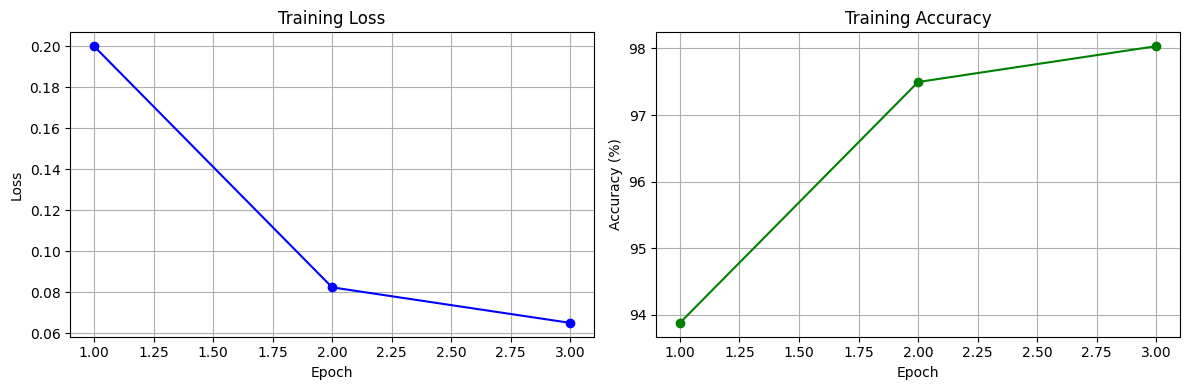


🎯 Final Results:
Training Accuracy: 98.03%
Test Accuracy: 98.98%


In [13]:
# Evaluation function
def evaluate_model(model, test_loader):
    """Evaluate model on test set."""
    model.eval()
    correct = 0
    total = 0
    all_predicted = []
    all_targets = []
    
    print("🧪 EVALUATING MODEL")
    print("=" * 50)
    
    with torch.no_grad():
        for data, targets in tqdm(test_loader, desc='Testing'):
            data, targets = data.to(device), targets.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs, 1)
            
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            all_predicted.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}% ({correct}/{total})')
    
    return accuracy, all_predicted, all_targets

# Evaluate the trained model
test_accuracy, predictions, targets = evaluate_model(model, test_loader)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_history['loss']) + 1), training_history['loss'], 'b-', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_history['accuracy']) + 1), training_history['accuracy'], 'g-', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\n🎯 Final Results:")
print(f"Training Accuracy: {training_history['accuracy'][-1]:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


## Part 6: Visualing Predictions

Let's see how our model predicts inputs!

🎯 PREDICTION VISUALIZATION


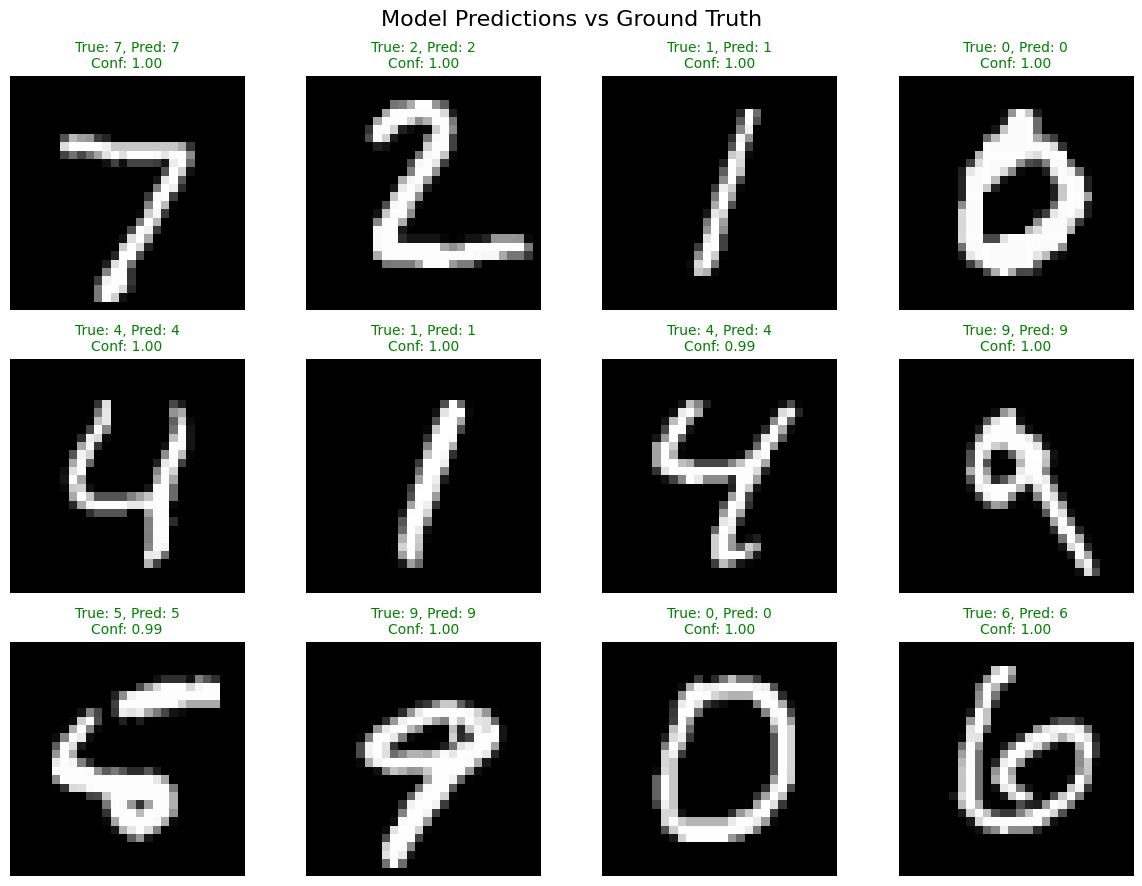


💾 Model saved as 'mnist_cnn.pth'

🎉 RECITATION COMPLETE!
Key achievements:
✅ Understood PyTorch tensors and autograd
✅ Built a CNN from scratch
✅ Trained on MNIST dataset
✅ Achieved 99.0% test accuracy
✅ Visualized results

Next: Complete Assignment 2 exercises!


In [15]:
# Visualize predictions
def plot_predictions(model, dataset, num_samples=12):
    """Plot model predictions on sample images."""
    model.eval()
    fig, axes = plt.subplots(3, 4, figsize=(12, 9))
    fig.suptitle('Model Predictions vs Ground Truth', fontsize=16)
    
    with torch.no_grad():
        for i in range(num_samples):
            row, col = i // 4, i % 4
            
            # Get sample
            image, true_label = dataset[i]
            image_input = image.unsqueeze(0).to(device)  # Add batch dimension
            
            # Make prediction
            output = model(image_input)
            predicted_label = torch.argmax(output, dim=1).item()
            confidence = torch.softmax(output, dim=1).max().item()
            
            # Plot
            image_np = image.squeeze().numpy()
            axes[row, col].imshow(image_np, cmap='gray')
            
            # Color-code: green for correct, red for incorrect
            color = 'green' if predicted_label == true_label else 'red'
            title = f'True: {true_label}, Pred: {predicted_label}\nConf: {confidence:.2f}'
            axes[row, col].set_title(title, color=color, fontsize=10)
            axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

print("🎯 PREDICTION VISUALIZATION")
plot_predictions(model, test_dataset)

# Save the trained model
torch.save(model.state_dict(), 'mnist_cnn.pth')
print("\n💾 Model saved as 'mnist_cnn.pth'")

print("\n🎉 RECITATION COMPLETE!")
print("=" * 50)
print("Key achievements:")
print("✅ Understood PyTorch tensors and autograd")
print("✅ Built a CNN from scratch")
print("✅ Trained on MNIST dataset")
print(f"✅ Achieved {test_accuracy:.1f}% test accuracy")
print("✅ Visualized results")
print("\nNext: Complete Assignment 2 exercises!")
